In [126]:
import pandas as pd
%matplotlib inline

df_raw = pd.read_csv("data/untappd_Beer_ratings.csv")

In [49]:
df_raw.head()

,Unnamed: 0,id,name,brewery,style,abv,ibu,rating
0,0,c4f2KE,Manifest Destiny ‘Murican Pilsner,Sierra Nevada Brewing Co.,Pilsner - Other,4.5% ABV,N/A IBU,(3.4)
1,1,c4f2KE,M'rica Pilsner,Lookout Brewing Co.,Pilsner - Other,5.4% ABV,N/A IBU,(3.34)
2,2,c4f2KE,Strohm's 'Merican Light Pilsner,Armstrong Ales,Pilsner - Other,3.2% ABV,12 IBU,(3.833)
3,3,c4f2KE,'Murican Pilsner (August 2013),Bad Dog Homebrewing,Homebrew | Pilsner - Other,5.6% ABV,N/A IBU,(0)
4,4,c4f2KE,'Murican Pilsner,Doster Brewing Co,Homebrew | Pilsner - Other,4.7% ABV,34 IBU,(0)


In [50]:
df_raw.shape

(1231, 8)

In [51]:
df_raw['brewery'].nunique()

601

In [52]:
for i in df_raw['brewery'].sort_values().unique():
    print(i)

10th District Brewing Company
13th Warrior Brewing Co
14th Star Brewing Company
17th Ave Brewing Cooperative
17th Floor Brewery
18th Street Brewery
21st Amendment Brewery
3 Brasseurs | 3 Brewers
3 Floyds Brewing Company
3 Stars Brewing Company
350 Brewing
4 Noses Brewing Company
420 Brewing Company
49th State Brewing Company
4th Tap Brewing Co-Op
612Brew
7 Seas Brewing
A-Train Brews
Alamo Beer Company
Alley Kat Brewing Company
Almanac Beer Company
Alpine Beer Company
Altitude Brewing
Altitude Chophouse and Brewery
Alvarado Street Brewery
Anchorage Brewing Company
Anderson Valley Brewing Company
Anheuser-Busch
Apocalypse Brew Works (Kentucky)
Arcadia Brewing Company
Arizona Wilderness Brewing Co.
Armstrong Ales
Artisan's
Astral Elixirs
Atlanta Brewing Co.
Atwater Brewery
Avery Brewing Co.
Aztec Brewery
B&J's Pizza & Brewpub
B-52 Brewing Co.
BEERWORKS Brewing Co.
BZW Bierzunft Wehntal
Back Porch Brewery
Bad Dog Homebrewing
Baerlic Brewing Company
Bald Brothers
Bale Breaker Brewing Compan

In [53]:
df_raw['style'].nunique()

170

In [54]:
for i in df_raw['style'].sort_values().unique():
    print(i)

Altbier
American Wild Ale
Barleywine - American
Barleywine - English
Barleywine - Other
Belgian Dubbel
Belgian Quad
Belgian Strong Dark Ale
Belgian Strong Golden Ale
Belgian Tripel
Blonde Ale
Blonde Ale - Belgian Blonde / Golden
Bock - Doppelbock
Bock - Maibock / Heller (Helles) / Lentebock
Bock - Single / Traditional
Bock - Weizenbock
Brown Ale - American
Brown Ale - English
Brown Ale - Imperial / Double
Brown Ale - Other
California Common
Cider - Other
Cider - Perry
Cream Ale
Dampfbier
Dark Ale
Dunkelweizen
English Bitter
English Mild Ale
Extra Special / Strong Bitter
Festbier
Fruit Beer
Gluten-Free
Golden Ale
Grisette
Gruit / Ancient Herbed Ale
Hefeweizen
Homebrew  |  Belgian Tripel
Homebrew  |  Black & Tan
Homebrew  |  Blonde Ale
Homebrew  |  Blonde Ale - Belgian Blonde / Golden
Homebrew  |  Brown Ale - American
Homebrew  |  California Common
Homebrew  |  Cider - Other
Homebrew  |  English Bitter
Homebrew  |  Fruit Beer
Homebrew  |  Hefeweizen
Homebrew  |  IPA - American
Homebrew  

> lets clean the numerical data first

In [55]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 8 columns):
Unnamed: 0    1231 non-null int64
id            1231 non-null object
name          1231 non-null object
brewery       1231 non-null object
style         1231 non-null object
abv           1231 non-null object
ibu           1231 non-null object
rating        1231 non-null object
dtypes: int64(1), object(7)
memory usage: 77.0+ KB


In [56]:
df_raw.head()

,Unnamed: 0,id,name,brewery,style,abv,ibu,rating
0,0,c4f2KE,Manifest Destiny ‘Murican Pilsner,Sierra Nevada Brewing Co.,Pilsner - Other,4.5% ABV,N/A IBU,(3.4)
1,1,c4f2KE,M'rica Pilsner,Lookout Brewing Co.,Pilsner - Other,5.4% ABV,N/A IBU,(3.34)
2,2,c4f2KE,Strohm's 'Merican Light Pilsner,Armstrong Ales,Pilsner - Other,3.2% ABV,12 IBU,(3.833)
3,3,c4f2KE,'Murican Pilsner (August 2013),Bad Dog Homebrewing,Homebrew | Pilsner - Other,5.6% ABV,N/A IBU,(0)
4,4,c4f2KE,'Murican Pilsner,Doster Brewing Co,Homebrew | Pilsner - Other,4.7% ABV,34 IBU,(0)


In [57]:
#take out parenthese in rating
df_raw['rating'] = df_raw['rating'].apply(lambda x: x.strip(')'))
df_raw['rating'] = df_raw['rating'].apply(lambda x: x.strip('('))

In [58]:
#convert to float
df_raw['rating'] = df_raw['rating'].astype(float)

In [59]:
# df_raw['rating'].unique()
# we see in the unique values that some are rounded to the thousandths place
# we want to limit the scope of the data by rounding to the tenth place
df_raw['rating']=df_raw['rating'].apply(lambda x: round(x,1))

In [60]:
df_raw['rating'].unique()

array([3.4, 3.3, 3.8, 0. , 3.6, 3.7, 4.1, 3.9, 3.5, 4. , 4.2, 4.3, 4.4,
       4.5, 3.2, 3.1, 2.6, 2.8, 3. , 2.9, 2.7, 4.6, 2.2, 2.4])

In [61]:
df_raw.head()

,Unnamed: 0,id,name,brewery,style,abv,ibu,rating
0,0,c4f2KE,Manifest Destiny ‘Murican Pilsner,Sierra Nevada Brewing Co.,Pilsner - Other,4.5% ABV,N/A IBU,3.4
1,1,c4f2KE,M'rica Pilsner,Lookout Brewing Co.,Pilsner - Other,5.4% ABV,N/A IBU,3.3
2,2,c4f2KE,Strohm's 'Merican Light Pilsner,Armstrong Ales,Pilsner - Other,3.2% ABV,12 IBU,3.8
3,3,c4f2KE,'Murican Pilsner (August 2013),Bad Dog Homebrewing,Homebrew | Pilsner - Other,5.6% ABV,N/A IBU,0.0
4,4,c4f2KE,'Murican Pilsner,Doster Brewing Co,Homebrew | Pilsner - Other,4.7% ABV,34 IBU,0.0


In [62]:
# now lets clean ibu
df_raw['ibu'] = df_raw['ibu'].apply(lambda x: x.strip(' IBU'))

In [63]:
# df_raw['ibu'].unique()
# only odd value is 'N/A'
df_raw['ibu'] = df_raw['ibu'].replace('N/A', 0)
df_raw['ibu'] = df_raw['ibu'].astype(float)

In [64]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 8 columns):
Unnamed: 0    1231 non-null int64
id            1231 non-null object
name          1231 non-null object
brewery       1231 non-null object
style         1231 non-null object
abv           1231 non-null object
ibu           1231 non-null float64
rating        1231 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 77.0+ KB


In [65]:
# now lets clean abv
df_raw['abv'] = df_raw['abv'].apply(lambda x: x.strip('% ABV'))

In [66]:
# df_raw['abv'].unique()
# there's a weird 'N/' value
df_raw['abv'] = df_raw['abv'].replace('N/', 0)
df_raw['abv'] = df_raw['abv'].astype(float)

In [67]:
df_raw['abv'] = df_raw['abv'].apply(lambda x: round(x,1))

In [68]:
# df_raw['abv'].unique()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 8 columns):
Unnamed: 0    1231 non-null int64
id            1231 non-null object
name          1231 non-null object
brewery       1231 non-null object
style         1231 non-null object
abv           1231 non-null float64
ibu           1231 non-null float64
rating        1231 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 77.0+ KB


In [69]:
df = df_raw[['abv', 'ibu', 'rating']]

<IPython.core.display.Javascript object>


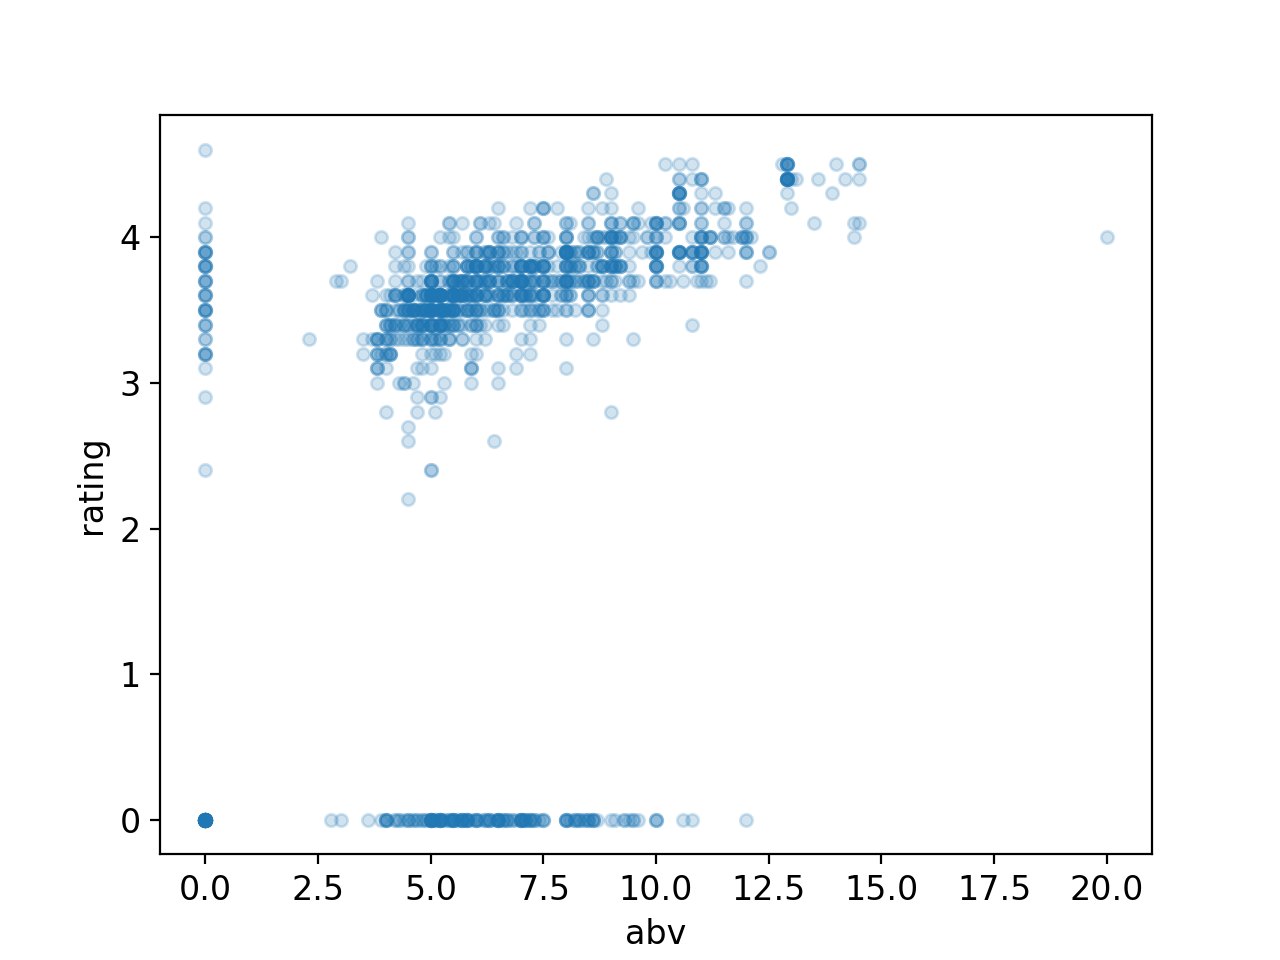

In [107]:
df.plot(kind='scatter', x='abv', y='rating', alpha=0.2)

<IPython.core.display.Javascript object>


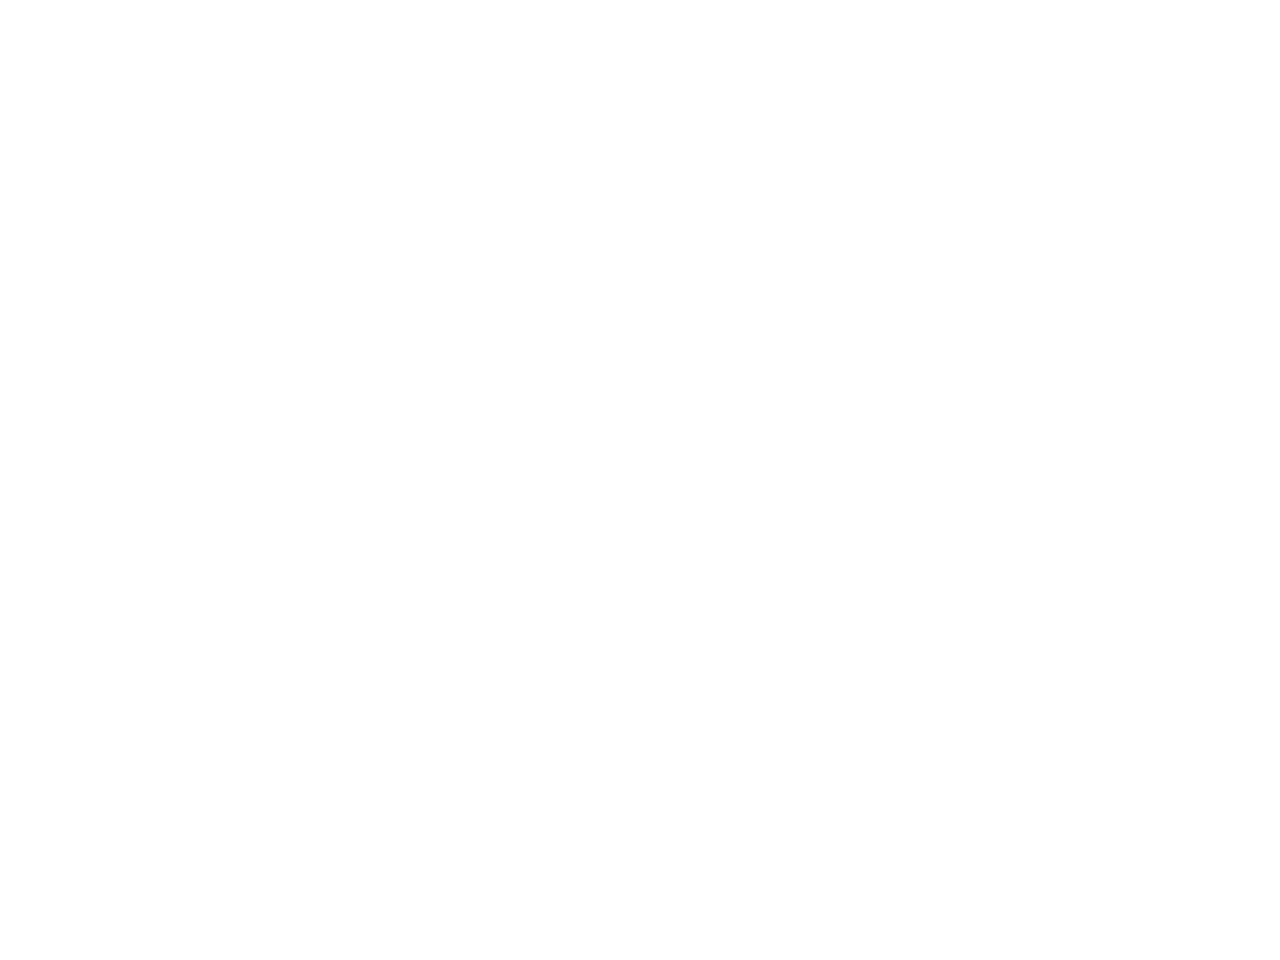

In [23]:
df.plot(kind='scatter', x='ibu', y='rating', alpha=0.5)

In [71]:
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [72]:
df_train_X = df.iloc[:,0:-1]
df_train_y = df.iloc[:,-1]

In [73]:
X_train,X_test,y_train,y_test=train_test_split(df_train_X, df_train_y,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

370 370


In [74]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
# plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

linear regression train score: 0.09841038876587127
linear regression test score: 0.12177013798181469
ridge regression train score low alpha: 0.09841038876560547
ridge regression test score low alpha: 0.1217701190255539
ridge regression train score high alpha: 0.09838467993798294
ridge regression test score high alpha: 0.12155407087774517


In [77]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [78]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.88 degrees.


In [79]:
train_score=rf.score(X_train, y_train)
test_score=rf.score(X_test, y_test)
print("random forest train score:", train_score)
print("random forest test score:", test_score)

random forest train score: 0.49504864917433167
random forest test score: 0.05821183942645691


# DATA SUCKS 
### lets clean it up some more, do some feature engineering

In [80]:
df_raw.head()

,Unnamed: 0,id,name,brewery,style,abv,ibu,rating
0,0,c4f2KE,Manifest Destiny ‘Murican Pilsner,Sierra Nevada Brewing Co.,Pilsner - Other,4.5,0.0,3.4
1,1,c4f2KE,M'rica Pilsner,Lookout Brewing Co.,Pilsner - Other,5.4,0.0,3.3
2,2,c4f2KE,Strohm's 'Merican Light Pilsner,Armstrong Ales,Pilsner - Other,3.2,12.0,3.8
3,3,c4f2KE,'Murican Pilsner (August 2013),Bad Dog Homebrewing,Homebrew | Pilsner - Other,5.6,0.0,0.0
4,4,c4f2KE,'Murican Pilsner,Doster Brewing Co,Homebrew | Pilsner - Other,4.7,34.0,0.0


In [175]:
def simple_style(x):
    x = x.lower()
    types = ['ale', 'stout', 'porter', 'sour', 'lager', 'pilsner', 'ipa', 'cider', 'wine', 'beer']
    found = False
    for a in types:
        if a in x:
            return a
            found = True
            
    if found == False:
        return 'other'

In [176]:
simple_style('something asf awrg aeh pilsner asdf')
# 'pilsner' in 'asdeh aer aerg a pilsner'

'pilsner'

In [177]:
df_raw['style'] = df_raw['style'].apply(lambda x: simple_style(x))

In [178]:
for i in df_raw['style'].unique():
    print(i)

pilsner
ale
ipa
beer
other
wine
lager
stout
sour
porter
cider


In [179]:
df_raw.head()
df_raw['style'].value_counts()

ale        442
ipa        252
stout      179
other      143
pilsner     53
beer        47
lager       44
sour        26
wine        19
porter      17
cider        9
Name: style, dtype: int64

In [94]:
df_all = pd.merge(df_raw, pd.get_dummies(df_raw['style']), left_index=True, right_index=True)

In [95]:
df_all.columns

Index(['Unnamed: 0', 'id', 'name', 'brewery', 'style', 'abv', 'ibu', 'rating',
       'ale', 'beer', 'cider', 'ipa', 'lager', 'other', 'pilsner', 'porter',
       'sour', 'stout', 'wine'],
      dtype='object')

In [96]:
df_all.head()
df_all.drop(['brewery', 'name', 'id', 'Unnamed: 0', 'style'], axis=1, inplace=True)

In [97]:
df_all.head()

,abv,ibu,rating,ale,beer,cider,ipa,lager,other,pilsner,porter,sour,stout,wine
0,4.5,0.0,3.4,0,0,0,0,0,0,1,0,0,0,0
1,5.4,0.0,3.3,0,0,0,0,0,0,1,0,0,0,0
2,3.2,12.0,3.8,0,0,0,0,0,0,1,0,0,0,0
3,5.6,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0
4,4.7,34.0,0.0,0,0,0,0,0,0,1,0,0,0,0


In [98]:
df_train_X = df_all.drop('rating', axis=1)
df_train_y = df_all.iloc[:,2]

In [99]:
X_train,X_test,y_train,y_test=train_test_split(df_train_X, df_train_y,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

370 370


In [100]:
rf.fit(X_train, y_train);

In [101]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.91 degrees.


In [102]:
train_score=rf.score(X_train, y_train)
test_score=rf.score(X_test, y_test)
print("random forest train score:", train_score)
print("random forest test score:", test_score)

random forest train score: 0.6575413055031927
random forest test score: -0.047887880224374284


In [103]:
from sklearn.metrics import roc_auc_score
sample_leaf_options = [1,5,10,50,100,200,500]
for leaf_size in sample_leaf_options :
    model = RandomForestRegressor(n_estimators = 200, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = leaf_size)
    model.fit(X_train, y_train)
    train_score=model.score(X_train, y_train)
    test_score=model.score(X_test, y_test)
    print(leaf_size)
    print("random forest train score:", train_score)
    print("random forest test score:", test_score)

1
random forest train score: 0.6543884114141458
random forest test score: -0.052555872831458794
5
random forest train score: 0.3242008311508102
random forest test score: 0.09236805984276719
10
random forest train score: 0.21938180903408622
random forest test score: 0.10581537809119479
50
random forest train score: 0.11412072593482381
random forest test score: 0.1019826238277931
100
random forest train score: 0.08279096163245081
random forest test score: 0.06499789064411565
200
random forest train score: 0.06017802767352043
random forest test score: 0.047550027437949116
500
random forest train score: -1.4422404632563612e-05
random forest test score: -3.614374909144402e-05


In [105]:
from sklearn.metrics import roc_auc_score
n_estimators = [100,200, 500, 1000, 2000]
for n_estimator in n_estimators :
    model = RandomForestRegressor(n_estimators = n_estimator, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = 10)
    model.fit(X_train, y_train)
    train_score=model.score(X_train, y_train)
    test_score=model.score(X_test, y_test)
    print(n_estimator)
    print("random forest train score:", train_score)
    print("random forest test score:", test_score)

100
random forest train score: 0.21985087688326554
random forest test score: 0.10372138098477623
200
random forest train score: 0.21938180903408622
random forest test score: 0.10581537809119479
500
random forest train score: 0.22074496758884865
random forest test score: 0.10380038500763676
1000
random forest train score: 0.22101037797915005
random forest test score: 0.10423010161018485
2000
random forest train score: 0.2212980754048273
random forest test score: 0.10509940688271524


In [ ]:
df_beers = pd.read_csv("data/beers.csv")
df_beers.head()olK

In [ ]:
df_beers.organic.value_counts()

In [110]:
df_breweries = pd.read_csv("data/untappd_breweries_ratings.csv")
df_breweries.head()

,Unnamed: 0,name,brewery,style,abv,ibu,rating,raters,date
0,0,Blue Suede Shews,https://untappd.com/PipsMeadery,Mead - Other,14% ABV,N/A IBU,(4.85),643 Ratings,Added 04/29/16
1,1,Find the Lady,https://untappd.com/PipsMeadery,Mead - Melomel,14% ABV,N/A IBU,(4.65),533 Ratings,Added 01/19/17
2,2,The Monte,https://untappd.com/PipsMeadery,Mead - Other,14% ABV,N/A IBU,(4.72),473 Ratings,Added 03/18/17
3,3,Levitation,https://untappd.com/PipsMeadery,Mead - Other,14% ABV,N/A IBU,(4.54),311 Ratings,Added 04/20/18
4,4,Call of the Void,https://untappd.com/PipsMeadery,Mead - Melomel,14% ABV,N/A IBU,(4.85),308 Ratings,Added 08/12/17


In [114]:
df_breweries['brewery'] = df_breweries['brewery'].apply(lambda x: x.split('/', 3)[-1])
df_breweries.head()

,Unnamed: 0,name,brewery,style,abv,ibu,rating,raters,date
0,0,Blue Suede Shews,PipsMeadery,Mead - Other,14% ABV,N/A IBU,(4.85),643 Ratings,Added 04/29/16
1,1,Find the Lady,PipsMeadery,Mead - Melomel,14% ABV,N/A IBU,(4.65),533 Ratings,Added 01/19/17
2,2,The Monte,PipsMeadery,Mead - Other,14% ABV,N/A IBU,(4.72),473 Ratings,Added 03/18/17
3,3,Levitation,PipsMeadery,Mead - Other,14% ABV,N/A IBU,(4.54),311 Ratings,Added 04/20/18
4,4,Call of the Void,PipsMeadery,Mead - Melomel,14% ABV,N/A IBU,(4.85),308 Ratings,Added 08/12/17


In [117]:
df_breweries['raters'] = df_breweries['raters'].apply(lambda x: x.split(' ', 1)[0])
df_breweries.head()

,Unnamed: 0,name,brewery,style,abv,ibu,rating,raters,date
0,0,Blue Suede Shews,PipsMeadery,Mead - Other,14% ABV,N/A IBU,(4.85),643,Added 04/29/16
1,1,Find the Lady,PipsMeadery,Mead - Melomel,14% ABV,N/A IBU,(4.65),533,Added 01/19/17
2,2,The Monte,PipsMeadery,Mead - Other,14% ABV,N/A IBU,(4.72),473,Added 03/18/17
3,3,Levitation,PipsMeadery,Mead - Other,14% ABV,N/A IBU,(4.54),311,Added 04/20/18
4,4,Call of the Void,PipsMeadery,Mead - Melomel,14% ABV,N/A IBU,(4.85),308,Added 08/12/17


In [118]:
df_breweries['rating'] = df_breweries['rating'].apply(lambda x: x.strip(')'))
df_breweries['rating'] = df_breweries['rating'].apply(lambda x: x.strip('('))
df_breweries.head()

,Unnamed: 0,name,brewery,style,abv,ibu,rating,raters,date
0,0,Blue Suede Shews,PipsMeadery,Mead - Other,14% ABV,N/A IBU,4.85,643,Added 04/29/16
1,1,Find the Lady,PipsMeadery,Mead - Melomel,14% ABV,N/A IBU,4.65,533,Added 01/19/17
2,2,The Monte,PipsMeadery,Mead - Other,14% ABV,N/A IBU,4.72,473,Added 03/18/17
3,3,Levitation,PipsMeadery,Mead - Other,14% ABV,N/A IBU,4.54,311,Added 04/20/18
4,4,Call of the Void,PipsMeadery,Mead - Melomel,14% ABV,N/A IBU,4.85,308,Added 08/12/17


In [119]:
df_breweries['ibu'] = df_breweries['ibu'].apply(lambda x: x.strip(' IBU'))
df_breweries.head()

,Unnamed: 0,name,brewery,style,abv,ibu,rating,raters,date
0,0,Blue Suede Shews,PipsMeadery,Mead - Other,14% ABV,N/A,4.85,643,Added 04/29/16
1,1,Find the Lady,PipsMeadery,Mead - Melomel,14% ABV,N/A,4.65,533,Added 01/19/17
2,2,The Monte,PipsMeadery,Mead - Other,14% ABV,N/A,4.72,473,Added 03/18/17
3,3,Levitation,PipsMeadery,Mead - Other,14% ABV,N/A,4.54,311,Added 04/20/18
4,4,Call of the Void,PipsMeadery,Mead - Melomel,14% ABV,N/A,4.85,308,Added 08/12/17


In [120]:
df_breweries['abv'] = df_breweries['abv'].apply(lambda x: x.strip('% ABV'))
df_breweries.head()

,Unnamed: 0,name,brewery,style,abv,ibu,rating,raters,date
0,0,Blue Suede Shews,PipsMeadery,Mead - Other,14,N/A,4.85,643,Added 04/29/16
1,1,Find the Lady,PipsMeadery,Mead - Melomel,14,N/A,4.65,533,Added 01/19/17
2,2,The Monte,PipsMeadery,Mead - Other,14,N/A,4.72,473,Added 03/18/17
3,3,Levitation,PipsMeadery,Mead - Other,14,N/A,4.54,311,Added 04/20/18
4,4,Call of the Void,PipsMeadery,Mead - Melomel,14,N/A,4.85,308,Added 08/12/17


In [121]:
df_breweries['date'] = df_breweries['date'].apply(lambda x: x.strip('Added '))
df_breweries.head()

,Unnamed: 0,name,brewery,style,abv,ibu,rating,raters,date
0,0,Blue Suede Shews,PipsMeadery,Mead - Other,14,N/A,4.85,643,04/29/16
1,1,Find the Lady,PipsMeadery,Mead - Melomel,14,N/A,4.65,533,01/19/17
2,2,The Monte,PipsMeadery,Mead - Other,14,N/A,4.72,473,03/18/17
3,3,Levitation,PipsMeadery,Mead - Other,14,N/A,4.54,311,04/20/18
4,4,Call of the Void,PipsMeadery,Mead - Melomel,14,N/A,4.85,308,08/12/17


In [123]:
df_breweries['date'] = pd.to_datetime(df_breweries.date)

In [125]:
df_breweries.head()

,Unnamed: 0,name,brewery,style,abv,ibu,rating,raters,date
0,0,Blue Suede Shews,PipsMeadery,Mead - Other,14,N/A,4.85,643,2016-04-29
1,1,Find the Lady,PipsMeadery,Mead - Melomel,14,N/A,4.65,533,2017-01-19
2,2,The Monte,PipsMeadery,Mead - Other,14,N/A,4.72,473,2017-03-18
3,3,Levitation,PipsMeadery,Mead - Other,14,N/A,4.54,311,2018-04-20
4,4,Call of the Void,PipsMeadery,Mead - Melomel,14,N/A,4.85,308,2017-08-12


In [127]:
df_breweries['ibu'] = df_breweries['ibu'].replace('N/A', 0)

In [129]:
df_breweries['abv'].unique()
df_breweries['abv'] = df_breweries['abv'].replace('N/', 0)

In [133]:
df_breweries['rating'].unique()
df_breweries['rating'] = df_breweries['rating'].replace('N/A', 0)

In [149]:
df_breweries['raters'].sort_values().unique()
df_breweries['raters'] = df_breweries['raters'].apply(lambda x: x.replace(",", ""))
df_breweries['raters'].sort_values().unique()

array(['0', '1', '10', '100', '10061', '1013', '101636', '10177', '1020',
       '1021', '10303', '1032', '1045', '10476', '1048', '105', '1051',
       '1058', '106', '1067', '107', '10758', '108', '1080', '1082',
       '10829', '1083', '10837', '1084', '1088', '109', '1090', '10980',
       '1099', '110', '1100', '1109', '11110', '1114', '11149', '1119',
       '112', '11205', '1122', '1124', '11244', '11259', '113', '11333',
       '11365', '11373', '11470', '115', '1152', '1153', '1154', '1159',
       '116', '11602', '11636', '1169', '117', '1174', '11747', '118',
       '119', '1198', '12', '12028', '1203', '1208', '121', '122', '1228',
       '1231', '12333', '12343', '1239', '124', '12456', '125', '1251',
       '1259', '126', '12616', '12644', '12685', '127', '12732', '128',
       '129', '13', '130', '13006', '13060', '131', '13107', '13116',
       '13159', '132', '13216', '13233', '1327', '1328', '1333', '134',
       '1341', '13473', '135', '1353', '1354', '136', '1360', 

In [150]:
df_breweries.info()
for col in ['abv', 'ibu', 'rating', 'raters']:
    df_breweries[col] = df_breweries[col].astype(float)
df_breweries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 9 columns):
Unnamed: 0    1235 non-null int64
name          1235 non-null object
brewery       1235 non-null object
style         1235 non-null object
abv           1235 non-null float64
ibu           1235 non-null float64
rating        1235 non-null float64
raters        1235 non-null object
date          1235 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 86.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 9 columns):
Unnamed: 0    1235 non-null int64
name          1235 non-null object
brewery       1235 non-null object
style         1235 non-null object
abv           1235 non-null float64
ibu           1235 non-null float64
rating        1235 non-null float64
raters        1235 non-null float64
date          1235 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object

In [153]:
df_breweries['rating']=df_breweries['rating'].apply(lambda x: round(x,1))
df_breweries['abv']=df_breweries['abv'].apply(lambda x: round(x,1))

In [165]:
(datetime.datetime.today()-df_breweries.loc[1,'date']).days

719

In [166]:
df_breweries['days_since'] = df_breweries['date'].apply(lambda x: (datetime.datetime.today()-x).days)

In [167]:
df_breweries.head()

,Unnamed: 0,name,brewery,style,abv,ibu,rating,raters,date,days_since
0,0,Blue Suede Shews,PipsMeadery,Mead - Other,14.0,0.0,4.8,643.0,2016-04-29,984
1,1,Find the Lady,PipsMeadery,Mead - Melomel,14.0,0.0,4.7,533.0,2017-01-19,719
2,2,The Monte,PipsMeadery,Mead - Other,14.0,0.0,4.7,473.0,2017-03-18,661
3,3,Levitation,PipsMeadery,Mead - Other,14.0,0.0,4.5,311.0,2018-04-20,263
4,4,Call of the Void,PipsMeadery,Mead - Melomel,14.0,0.0,4.8,308.0,2017-08-12,514


In [168]:
df_breweries['raters_per_day'] = df_breweries['raters']/df_breweries['days_since']

In [172]:
df_breweries.head()
df_breweries['raters_per_day'] = df_breweries['raters_per_day'].apply(lambda x: round(x,2))

In [183]:
df_breweries.head()

,Unnamed: 0,name,brewery,style,abv,ibu,rating,raters,date,days_since,raters_per_day
0,0,Blue Suede Shews,PipsMeadery,Mead - Other,14.0,0.0,4.8,643.0,2016-04-29,984,0.65
1,1,Find the Lady,PipsMeadery,Mead - Melomel,14.0,0.0,4.7,533.0,2017-01-19,719,0.74
2,2,The Monte,PipsMeadery,Mead - Other,14.0,0.0,4.7,473.0,2017-03-18,661,0.72
3,3,Levitation,PipsMeadery,Mead - Other,14.0,0.0,4.5,311.0,2018-04-20,263,1.18
4,4,Call of the Void,PipsMeadery,Mead - Melomel,14.0,0.0,4.8,308.0,2017-08-12,514,0.60


In [184]:
df_breweries_test = df_breweries.copy()

In [185]:
df_breweries_test['style'] = df_breweries_test['style'].apply(lambda x: simple_style(x))

In [186]:
df_breweries_test = df_breweries_test[['style', 'abv', 'rating', 'raters', 'raters_per_day']]

In [187]:
df_all_test = pd.merge(df_breweries_test, pd.get_dummies(df_breweries_test['style']), left_index=True, right_index=True)
df_all_test.head()

,style,abv,rating,raters,raters_per_day,ale,beer,cider,ipa,other,pilsner,porter,sour,stout,wine
0,other,14.0,4.8,643.0,0.65,0,0,0,0,1,0,0,0,0,0
1,other,14.0,4.7,533.0,0.74,0,0,0,0,1,0,0,0,0,0
2,other,14.0,4.7,473.0,0.72,0,0,0,0,1,0,0,0,0,0
3,other,14.0,4.5,311.0,1.18,0,0,0,0,1,0,0,0,0,0
4,other,14.0,4.8,308.0,0.60,0,0,0,0,1,0,0,0,0,0


In [194]:
# df_all_test.drop('style', axis=1, inplace=True)

In [195]:
df_train_X = df_all_test.drop('rating', axis=1)
df_train_y = df_all_test.iloc[:,2]

In [196]:
X_train,X_test,y_train,y_test=train_test_split(df_train_X, df_train_y,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))

371 371


In [197]:
rf.fit(X_train, y_train);

In [198]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 267.91 degrees.


In [199]:
train_score=rf.score(X_train, y_train)
test_score=rf.score(X_test, y_test)
print("random forest train score:", train_score)
print("random forest test score:", test_score)

random forest train score: 0.9923965031530423
random forest test score: 0.8891753491506748
